In [17]:
import pandas

In [18]:
stock_info=pandas.read_csv('Stock_Dataset.csv')

In [19]:
stock_info

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change,Price_Change
0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836,-0.012635
1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364,-0.015849
2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683,-0.026000
3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713,0.001992
4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283,0.032787
...,...,...,...,...,...,...,...,...,...
8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748,-0.014501
8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949,-0.051572
8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307,0.029715
8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784,-0.020466


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from seaborn import scatterplot
import matplotlib.pyplot as pyplot

In [21]:
y=stock_info.iloc[:,-1:]
x=stock_info.iloc[:,:-1]

In [22]:
x

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change
0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836
1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364
2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683
3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713
4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283
...,...,...,...,...,...,...,...,...
8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748
8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949
8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307
8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784


In [23]:
y

,Price_Change
0,-0.012635
1,-0.015849
2,-0.026000
3,0.001992
4,0.032787
...,...
8108,-0.014501
8109,-0.051572
8110,0.029715
8111,-0.020466


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=421,test_size=0.225,shuffle=True)

In [25]:
len(x_test)

1826

In [26]:
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,random_state=124,test_size=0.375,shuffle=True)

In [27]:
print(len(x_train),len(x_test),len(x_val))

6287 1141 685


In [28]:
def x_imputer(dataset):
    imputer=KNNImputer(n_neighbors=3)
    x_impute=imputer.fit_transform(dataset)
    x_impute=pandas.DataFrame(data=x_impute,columns=['Return_On_Equity','Current_Ratio','Asster_Turnover','WACC','Dividend_Yield','Earnings_Yield','Revenue_Change','Net_Income_Change'])
    return x_impute
x_train=x_imputer(x_train)
x_test=x_imputer(x_test)
x_val=x_imputer(x_val)

y_train=y_train.apply(lambda col: col.fillna(col.mean()))
y_test=y_test.apply(lambda col: col.fillna(col.mean()))
y_val=y_val.apply(lambda col: col.fillna(col.mean()))

In [29]:
x_train.isnull().astype(int).sum()/len(x_train)

Return_On_Equity     0.0
Current_Ratio        0.0
Asster_Turnover      0.0
WACC                 0.0
Dividend_Yield       0.0
Earnings_Yield       0.0
Revenue_Change       0.0
Net_Income_Change    0.0
dtype: float64

In [30]:
y_train=y_train.pop('Price_Change')
y_test=y_test.pop('Price_Change')
y_val=y_val.pop('Price_Change')

In [59]:
neighbor=KNeighborsRegressor(n_neighbors=20)
forest=RandomForestRegressor(n_estimators=175,max_depth=39)
tweedie=TweedieRegressor()
lasso=LassoCV(cv=4)
xgbooster=XGBRegressor(n_estimators=1000,max_depth=7,eta=.001,subsample=.75,colsample_bytree=.9,num_parallel_tree=2)
ridge=BayesianRidge()
bag=BaggingRegressor(n_estimators=250)
regression_models=[('neighbor',neighbor),('forest',forest),('tweedie',tweedie),('lasso',lasso),('xgbooster',xgbooster),('ridge',ridge),('bag',bag)]
vote=VotingRegressor(regression_models)

In [60]:
vote.fit(x_train,y_train)

VotingRegressor(estimators=[('neighbor', KNeighborsRegressor(n_neighbors=20)),
                            ('forest',
                             RandomForestRegressor(max_depth=39,
                                                   n_estimators=175)),
                            ('tweedie', TweedieRegressor()),
                            ('lasso', LassoCV(cv=4)),
                            ('xgbooster',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.9, device=None,
                                          early_...
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=7,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=2, ...)),
                            ('ridge', BayesianRidge()),
                            ('bag', BaggingRegressor(n_estimators=250))])

In [61]:
y_predict=vote.predict(x_test.values)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but TweedieRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have v

<Axes: xlabel='Price_Change'>

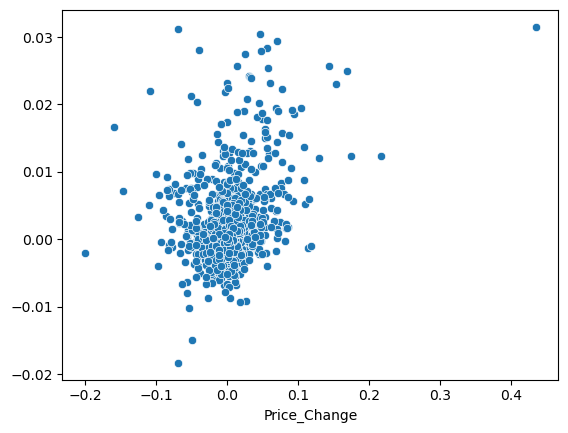

In [62]:
scatterplot(x=y_test,y=y_predict)

In [63]:
error=(mean_squared_error(y_test,y_predict)**.5)
error

0.03478312632424993

In [64]:
y_evaluation=vote.predict(x_val.values)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but TweedieRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have v

In [65]:
error=(mean_squared_error(y_val,y_evaluation)**.5)
error

0.03102838209853557

(-0.02, 0.04)

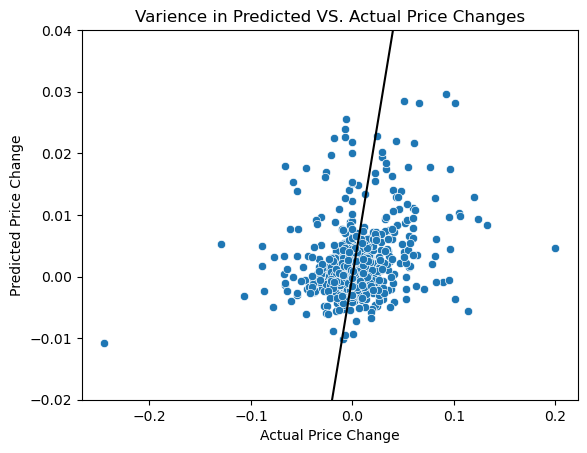

In [67]:
scatterplot(x=y_val,y=y_evaluation)
pyplot.ylabel('Predicted Price Change')
pyplot.xlabel('Actual Price Change')
pyplot.title('Varience in Predicted VS. Actual Price Changes')
pyplot.plot([-.2,.2],[-.2,.2],color='black')
pyplot.ylim([-.02,.04])
